# Install and import libraries

In [1]:
#!pip install prophet

In [2]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

# Load, explore and clean data

In [3]:
df = pd.read_csv("weather_data.csv")

In [4]:
df.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [5]:
df.isna().sum()

DATE       0
MinTemp    4
MaxTemp    4
AvgTemp    4
Sunrise    0
Sunset     0
dtype: int64

In [6]:
df[df.isna().any(axis=1)]

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
136,5/17/2014,NaN,NaN,NaN,546,1851
840,4/20/2016,NaN,NaN,NaN,600,1842
1204,4/19/2017,NaN,NaN,NaN,602,1841
1752,10/19/2018,NaN,NaN,NaN,618,1756


In [7]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1821 non-null   object 
 1   MinTemp  1821 non-null   float64
 2   MaxTemp  1821 non-null   float64
 3   AvgTemp  1821 non-null   float64
 4   Sunrise  1821 non-null   int64  
 5   Sunset   1821 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 85.5+ KB


In [9]:
df.describe(include="all")

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
count,1821,1821.000000,1821.000000,1821.000000,1821.000000,1821.000000
unique,1821,NaN,NaN,NaN,NaN,NaN
top,1/1/2014,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.637013,54.515102,46.818781,607.108731,1823.003844
std,NaN,3.798284,5.013654,4.143192,40.815966,49.576486
min,NaN,22.000000,36.000000,31.000000,543.000000,1742.000000
25%,NaN,36.000000,52.000000,44.000000,557.000000,1802.000000
50%,NaN,39.000000,55.000000,47.000000,614.000000,1831.000000
75%,NaN,41.000000,58.000000,50.000000,640.000000,1851.000000


# Prepare data for modelling

In [10]:
df = df[["DATE", "AvgTemp"]]
df.head()

,DATE,AvgTemp
0,1/1/2014,40.0
1,1/2/2014,43.0
2,1/3/2014,41.0
3,1/4/2014,37.0
4,1/5/2014,31.0


In [11]:
# change column names - must for prophet
df.columns = ["ds", "y"]

In [12]:
# change datatype of ds to datetime
df["ds"] = pd.to_datetime(df["ds"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1821 non-null   datetime64[ns]
 1   y       1821 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.6 KB


In [13]:
df.head()

,ds,y
0,2014-01-01,40.0
1,2014-01-02,43.0
2,2014-01-03,41.0
3,2014-01-04,37.0
4,2014-01-05,31.0


# Plot time series

<AxesSubplot:xlabel='ds'>

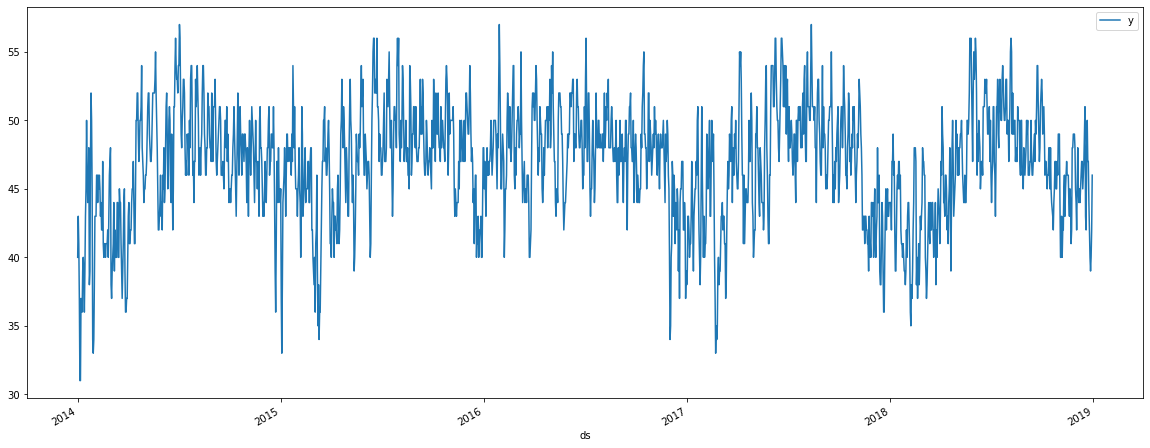

In [14]:
df.plot(x="ds", y="y", figsize=(20, 8))

# Split train and test data

In [15]:
print(df["ds"].min(), df["ds"].max())

2014-01-01 00:00:00 2018-12-30 00:00:00


In [16]:
test_size = len(df)*0.2
test_size = int(test_size)
test_size

364

In [17]:
train = df.iloc[:-test_size]
test = df.iloc[-test_size:]

In [18]:
train.shape, test.shape

((1457, 2), (364, 2))

# Predict using Prophet

In [19]:
m = Prophet()
m.fit(train)

c:\Users\marek.stepan\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
12:09:15 - cmdstanpy - INFO - Chain [1] start processing
12:09:16 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
future = m.make_future_dataframe(periods=test_size) # create ds for future dates
forecast = m.predict(future) # predict y for future dates

In [21]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,43.840524,35.205209,43.476495,43.840524,43.840524,-4.528338,-4.528338,-4.528338,-0.054198,-0.054198,-0.054198,-4.474140,-4.474140,-4.474140,0.0,0.0,0.0,39.312186
1,2014-01-02,43.855841,35.316000,44.013021,43.855841,43.855841,-4.230445,-4.230445,-4.230445,0.097072,0.097072,0.097072,-4.327517,-4.327517,-4.327517,0.0,0.0,0.0,39.625395
2,2014-01-03,43.871157,35.872551,44.240647,43.871157,43.871157,-3.735394,-3.735394,-3.735394,0.425191,0.425191,0.425191,-4.160585,-4.160585,-4.160585,0.0,0.0,0.0,40.135763
3,2014-01-04,43.886474,35.571782,44.258511,43.886474,43.886474,-3.972272,-3.972272,-3.972272,0.003657,0.003657,0.003657,-3.975929,-3.975929,-3.975929,0.0,0.0,0.0,39.914202
4,2014-01-05,43.901791,35.685927,44.188204,43.901791,43.901791,-4.017107,-4.017107,-4.017107,-0.240746,-0.240746,-0.240746,-3.776361,-3.776361,-3.776361,0.0,0.0,0.0,39.884684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,2018-12-25,46.321231,36.936395,46.134826,44.736353,47.817146,-4.918616,-4.918616,-4.918616,-0.147416,-0.147416,-0.147416,-4.771200,-4.771200,-4.771200,0.0,0.0,0.0,41.402615
1817,2018-12-26,46.320691,36.627266,45.993075,44.726726,47.816098,-4.871006,-4.871006,-4.871006,-0.054198,-0.054198,-0.054198,-4.816807,-4.816807,-4.816807,0.0,0.0,0.0,41.449685
1818,2018-12-27,46.320150,36.960667,46.198251,44.717100,47.818415,-4.737367,-4.737367,-4.737367,0.097072,0.097072,0.097072,-4.834439,-4.834439,-4.834439,0.0,0.0,0.0,41.582784
1819,2018-12-28,46.319610,36.890013,46.234732,44.709632,47.822118,-4.398551,-4.398551,-4.398551,0.425191,0.425191,0.425191,-4.823742,-4.823742,-4.823742,0.0,0.0,0.0,41.921058


In [22]:
plot_plotly(m, forecast)

In [23]:
plot_components_plotly(m, forecast)

# Evaluate predictions

In [24]:
# import mse
from sklearn.metrics import mean_squared_error
import numpy as np

In [25]:
test_predictions = forecast.iloc[-test_size:]["yhat"]

In [26]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [27]:
# absolute rmse to 3 decimals
armse = np.round(rmse(test["y"], test_predictions),3)
print("Absolute RMSE: ", armse)


Absolute RMSE:  3.462


In [28]:
# relative rmse to 2 decimals
rrmse = np.round(100*rmse(test["y"], test_predictions)/test["y"].mean(), 2)
print(f"Relative root mean squared error: {rrmse}%")

Relative root mean squared error: 7.48%


In [29]:
evaluate_df = pd.DataFrame({"ds": test["ds"], "y_true": test["y"], "y_pred": test_predictions})

In [30]:
evaluate_df["day"] = evaluate_df["ds"].dt.day
evaluate_df["day_of_week"] = evaluate_df["ds"].dt.day_name()
evaluate_df["month"] = evaluate_df["ds"].dt.month

evaluate_df['day_of_week'] = pd.Categorical(evaluate_df['day_of_week'], 
                                            [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                                             'Friday', 'Saturday', 'Sunday'])


In [31]:
evaluate_df["diff"] = evaluate_df["y_true"] - evaluate_df["y_pred"]

In [32]:
def diff_rmse(diff):
    return np.sqrt(np.power(diff, 2).mean())

<AxesSubplot:xlabel='day_of_week'>

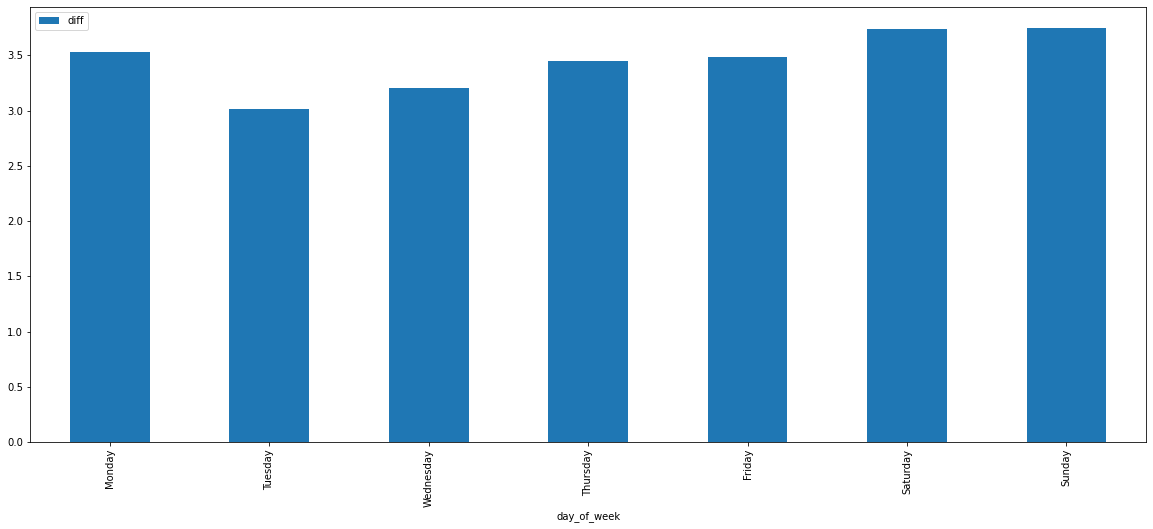

In [33]:
# evaluate by day of week
evaluate_df.groupby("day_of_week")["diff"].agg(diff_rmse).to_frame().reset_index()\
    .plot(x = "day_of_week", y = "diff", kind = "bar", figsize = (20, 8))

<AxesSubplot:xlabel='month'>

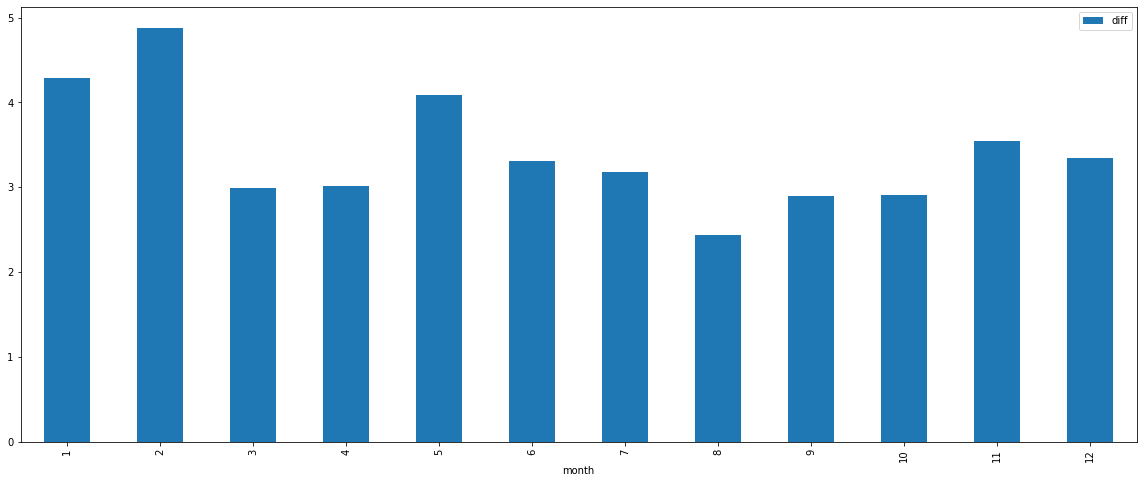

In [34]:
# evaluate by month
evaluate_df.groupby("month")["diff"].agg(diff_rmse).to_frame().reset_index()\
    .plot(x = "month", y = "diff", kind = "bar", figsize = (20, 8))

<AxesSubplot:xlabel='day'>

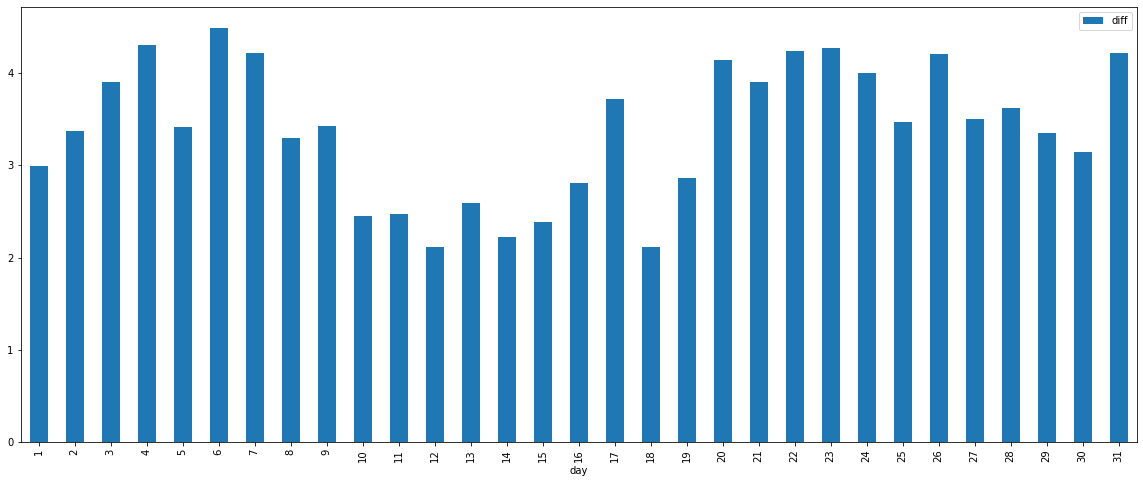

In [35]:
# evaluate by day of month
evaluate_df.groupby("day")["diff"].agg(diff_rmse).to_frame().reset_index()\
    .plot(x = "day", y = "diff", kind = "bar", figsize = (20, 8))